In [1]:
import sys
assert sys.version_info[0]==3
assert sys.version_info[1] >= 5

from platform import python_version
assert int(python_version().split(".")[1]) >= 5, "Please upgrade your Python version following the instructions in \
    the README.txt file found in the same directory as this notebook. Your Python version is " + python_version()

from gensim.models import KeyedVectors
from gensim.test.utils import datapath
import pprint
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]
import nltk
nltk.download('reuters') #to specify download location, optionally add the argument: download_dir='/specify/desired/path/'
from nltk.corpus import reuters
import numpy as np
import random
import scipy as sp
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import PCA

START_TOKEN = '<START>'
END_TOKEN = '<END>'

np.random.seed(0)
random.seed(0)

[nltk_data] Downloading package reuters to /root/nltk_data...


In [2]:
def read_corpus(category="grain"):
    """ Read files from the specified Reuter's category.
        Params:
            category (string): category name
        Return:
            list of lists, with words from each of the processed files
    """
    files = reuters.fileids(category)
    return [[START_TOKEN] + [w.lower() for w in list(reuters.words(f))] + [END_TOKEN] for f in files]

In [3]:
reuters_corpus = read_corpus()
pprint.pprint(reuters_corpus[:3], compact=True, width=100)

[['<START>', 'china', 'daily', 'says', 'vermin', 'eat', '7', '-', '12', 'pct', 'grain', 'stocks',
  'a', 'survey', 'of', '19', 'provinces', 'and', 'seven', 'cities', 'showed', 'vermin', 'consume',
  'between', 'seven', 'and', '12', 'pct', 'of', 'china', "'", 's', 'grain', 'stocks', ',', 'the',
  'china', 'daily', 'said', '.', 'it', 'also', 'said', 'that', 'each', 'year', '1', '.', '575',
  'mln', 'tonnes', ',', 'or', '25', 'pct', ',', 'of', 'china', "'", 's', 'fruit', 'output', 'are',
  'left', 'to', 'rot', ',', 'and', '2', '.', '1', 'mln', 'tonnes', ',', 'or', 'up', 'to', '30',
  'pct', ',', 'of', 'its', 'vegetables', '.', 'the', 'paper', 'blamed', 'the', 'waste', 'on',
  'inadequate', 'storage', 'and', 'bad', 'preservation', 'methods', '.', 'it', 'said', 'the',
  'government', 'had', 'launched', 'a', 'national', 'programme', 'to', 'reduce', 'waste', ',',
  'calling', 'for', 'improved', 'technology', 'in', 'storage', 'and', 'preservation', ',', 'and',
  'greater', 'production', 'of', 

In [4]:
size = -1
sum = 0
dict1 = {}
list1 = []
for values in reuters_corpus:
  for value in values:
    dict1[value] = 1
for key, value in dict1.items():
  list1.append(key)
print(len(dict1))
print(list1)

7146
['<START>', 'china', 'daily', 'says', 'vermin', 'eat', '7', '-', '12', 'pct', 'grain', 'stocks', 'a', 'survey', 'of', '19', 'provinces', 'and', 'seven', 'cities', 'showed', 'consume', 'between', "'", 's', ',', 'the', 'said', '.', 'it', 'also', 'that', 'each', 'year', '1', '575', 'mln', 'tonnes', 'or', '25', 'fruit', 'output', 'are', 'left', 'to', 'rot', '2', 'up', '30', 'its', 'vegetables', 'paper', 'blamed', 'waste', 'on', 'inadequate', 'storage', 'bad', 'preservation', 'methods', 'government', 'had', 'launched', 'national', 'programme', 'reduce', 'calling', 'for', 'improved', 'technology', 'in', 'greater', 'production', 'additives', 'gave', 'no', 'further', 'details', '<END>', 'thai', 'trade', 'deficit', 'widens', 'first', 'quarter', 'thailand', 'widened', '4', '5', 'billion', 'baht', '1987', 'from', 'ago', 'business', 'economics', 'department', 'janunary', '/', 'march', 'imports', 'rose', '65', '58', 'climate', 'this', 'resulted', '27', 'increase', 'raw', 'materials', 'semi', '

In [5]:
def distinct_words(corpus):
    """ Determine a list of distinct words for the corpus.
        Params:
            corpus (list of list of strings): corpus of documents
        Return:
            corpus_words (list of strings): sorted list of distinct words across the corpus
            n_corpus_words (integer): number of distinct words across the corpus
    """
    corpus_words = []
    n_corpus_words = -1
    dict1 = {}

    # ------------------
    # Write your implementation here.

    for values in corpus:
      for value in values:
        dict1[value] = 1
    n_corpus_words = len(dict1)
    for key, value in dict1.items():
      corpus_words.append(key)
    corpus_words.sort()

    # ------------------

    return corpus_words, n_corpus_words

In [6]:
# ---------------------
# Run this sanity check
# Note that this not an exhaustive check for correctness.
# ---------------------

# Define toy corpus
test_corpus = ["{} All that glitters isn't gold {}".format(START_TOKEN, END_TOKEN).split(" "), "{} All's well that ends well {}".format(START_TOKEN, END_TOKEN).split(" ")]
test_corpus_words, num_corpus_words = distinct_words(test_corpus)

# Correct answers
ans_test_corpus_words = sorted([START_TOKEN, "All", "ends", "that", "gold", "All's", "glitters", "isn't", "well", END_TOKEN])
ans_num_corpus_words = len(ans_test_corpus_words)

# Test correct number of words
assert(num_corpus_words == ans_num_corpus_words), "Incorrect number of distinct words. Correct: {}. Yours: {}".format(ans_num_corpus_words, num_corpus_words)

# Test correct words
assert (test_corpus_words == ans_test_corpus_words), "Incorrect corpus_words.\nCorrect: {}\nYours:   {}".format(str(ans_test_corpus_words), str(test_corpus_words))

# Print Success
print ("-" * 80)
print("Passed All Tests!")
print ("-" * 80)

--------------------------------------------------------------------------------
Passed All Tests!
--------------------------------------------------------------------------------


In [7]:
corpus = [['<START>', 'All', 'that', 'glitters', 'isn\'t', 'gold', '<END>'], ['<START>', 'All\'s', 'well', 'that', 'ends', 'well', '<END>']]
words, n_words = distinct_words(corpus)
window_size = 1
M = None
word2ind = {}
cnt = 0
M = np.zeros((n_words, n_words))
for value in words:
  word2ind[value] = cnt
  cnt += 1
print(words)
print(word2ind)
for lists in corpus:
  print(lists)
  for i, word in enumerate(lists):
    if word == '<END>' or word == '<START>':
      continue
    if i == 1:
      M[word2ind['<START>']][word2ind[word]]+=1
      M[word2ind[word]][word2ind['<START>']]+=1

    if i == len(lists)-2:
      M[word2ind['<END>']][word2ind[word]]+=1
      M[word2ind[word]][word2ind['<END>']]+=1

    for ind in range(1, window_size+1):

      if i-ind >= 1:
        M[word2ind[word]][word2ind[lists[i-ind]]]+=1

      if i+ind <= len(lists)-2:
        M[word2ind[word]][word2ind[lists[i+ind]]]+=1
print(M)

['<END>', '<START>', 'All', "All's", 'ends', 'glitters', 'gold', "isn't", 'that', 'well']
{'<END>': 0, '<START>': 1, 'All': 2, "All's": 3, 'ends': 4, 'glitters': 5, 'gold': 6, "isn't": 7, 'that': 8, 'well': 9}
['<START>', 'All', 'that', 'glitters', "isn't", 'gold', '<END>']
['<START>', "All's", 'well', 'that', 'ends', 'well', '<END>']
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 1.]
 [0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 1. 0. 1. 1. 0. 0. 0. 1.]
 [1. 0. 0. 1. 1. 0. 0. 0. 1. 0.]]


In [8]:
def compute_co_occurrence_matrix(corpus, window_size=4):
    """ Compute co-occurrence matrix for the given corpus and window_size (default of 4).

        Note: Each word in a document should be at the center of a window. Words near edges will have a smaller
              number of co-occurring words.

              For example, if we take the document "<START> All that glitters is not gold <END>" with window size of 4,
              "All" will co-occur with "<START>", "that", "glitters", "is", and "not".

        Params:
            corpus (list of list of strings): corpus of documents
            window_size (int): size of context window
        Return:
            M (a symmetric numpy matrix of shape (number of unique words in the corpus , number of unique words in the corpus)):
                Co-occurence matrix of word counts.
                The ordering of the words in the rows/columns should be the same as the ordering of the words given by the distinct_words function.
            word2ind (dict): dictionary that maps word to index (i.e. row/column number) for matrix M.
    """
    words, n_words = distinct_words(corpus)
    M = None
    word2ind = {}

    # ------------------
    # Write your implementation here.

    cnt = 0
    M = np.zeros((n_words, n_words))
    for value in words:
      word2ind[value] = cnt
      cnt += 1

    for lists in corpus:
      for i, word in enumerate(lists):
        if i==0 or i==len(lists)-1:
          continue
        if i == 1:
          M[word2ind['<START>']][word2ind[word]]+=1
          M[word2ind[word]][word2ind['<START>']]+=1

        if i == len(lists)-2:
          M[word2ind['<END>']][word2ind[word]]+=1
          M[word2ind[word]][word2ind['<END>']]+=1

        for ind in range(1, window_size+1):
          if i-ind >= 1:
            M[word2ind[word]][word2ind[lists[i-ind]]]+=1

          if i+ind <= len(lists)-2:
            M[word2ind[word]][word2ind[lists[i+ind]]]+=1

    # ------------------

    return M, word2ind

In [9]:
# ---------------------
# Run this sanity check
# Note that this is not an exhaustive check for correctness.
# ---------------------

# Define toy corpus and get student's co-occurrence matrix
test_corpus = ["{} All that glitters isn't gold {}".format(START_TOKEN, END_TOKEN).split(" "), "{} All's well that ends well {}".format(START_TOKEN, END_TOKEN).split(" ")]
M_test, word2ind_test = compute_co_occurrence_matrix(test_corpus, window_size=1)

# Correct M and word2ind
M_test_ans = np.array(
    [[0., 0., 0., 0., 0., 0., 1., 0., 0., 1.,],
     [0., 0., 1., 1., 0., 0., 0., 0., 0., 0.,],
     [0., 1., 0., 0., 0., 0., 0., 0., 1., 0.,],
     [0., 1., 0., 0., 0., 0., 0., 0., 0., 1.,],
     [0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,],
     [0., 0., 0., 0., 0., 0., 0., 1., 1., 0.,],
     [1., 0., 0., 0., 0., 0., 0., 1., 0., 0.,],
     [0., 0., 0., 0., 0., 1., 1., 0., 0., 0.,],
     [0., 0., 1., 0., 1., 1., 0., 0., 0., 1.,],
     [1., 0., 0., 1., 1., 0., 0., 0., 1., 0.,]]
)
ans_test_corpus_words = sorted([START_TOKEN, "All", "ends", "that", "gold", "All's", "glitters", "isn't", "well", END_TOKEN])
word2ind_ans = dict(zip(ans_test_corpus_words, range(len(ans_test_corpus_words))))

# Test correct word2ind
assert (word2ind_ans == word2ind_test), "Your word2ind is incorrect:\nCorrect: {}\nYours: {}".format(word2ind_ans, word2ind_test)

# Test correct M shape
assert (M_test.shape == M_test_ans.shape), "M matrix has incorrect shape.\nCorrect: {}\nYours: {}".format(M_test.shape, M_test_ans.shape)

# Test correct M values
for w1 in word2ind_ans.keys():
    idx1 = word2ind_ans[w1]
    for w2 in word2ind_ans.keys():
        idx2 = word2ind_ans[w2]
        student = M_test[idx1, idx2]
        correct = M_test_ans[idx1, idx2]
        if student != correct:
            print("Correct M:")
            print(M_test_ans)
            print("Your M: ")
            print(M_test)
            raise AssertionError("Incorrect count at index ({}, {})=({}, {}) in matrix M. Yours has {} but should have {}.".format(idx1, idx2, w1, w2, student, correct))

# Print Success
print ("-" * 80)
print("Passed All Tests!")
print ("-" * 80)

--------------------------------------------------------------------------------
Passed All Tests!
--------------------------------------------------------------------------------


In [10]:
def reduce_to_k_dim(M, k=2):
    """ Reduce a co-occurence count matrix of dimensionality (num_corpus_words, num_corpus_words)
        to a matrix of dimensionality (num_corpus_words, k) using the following SVD function from Scikit-Learn:
            - http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html

        Params:
            M (numpy matrix of shape (number of unique words in the corpus , number of unique words in the corpus)): co-occurence matrix of word counts
            k (int): embedding size of each word after dimension reduction
        Return:
            M_reduced (numpy matrix of shape (number of corpus words, k)): matrix of k-dimensioal word embeddings.
                    In terms of the SVD from math class, this actually returns U * S
    """
    n_iters = 10     # Use this parameter in your call to `TruncatedSVD`
    M_reduced = None
    print("Running Truncated SVD over %i words..." % (M.shape[0]))

    # ------------------
    # Write your implementation here.

    svd = TruncatedSVD(n_components=k, n_iter=n_iters)
    M_reduced = svd.fit_transform(M)

    # ------------------

    print("Done.")
    return M_reduced

In [11]:
# ---------------------
# Run this sanity check
# Note that this is not an exhaustive check for correctness
# In fact we only check that your M_reduced has the right dimensions.
# ---------------------

# Define toy corpus and run student code
test_corpus = ["{} All that glitters isn't gold {}".format(START_TOKEN, END_TOKEN).split(" "), "{} All's well that ends well {}".format(START_TOKEN, END_TOKEN).split(" ")]
M_test, word2ind_test = compute_co_occurrence_matrix(test_corpus, window_size=1)
M_test_reduced = reduce_to_k_dim(M_test, k=2)

# Test proper dimensions
assert (M_test_reduced.shape[0] == 10), "M_reduced has {} rows; should have {}".format(M_test_reduced.shape[0], 10)
assert (M_test_reduced.shape[1] == 2), "M_reduced has {} columns; should have {}".format(M_test_reduced.shape[1], 2)

# Print Success
print ("-" * 80)
print("Passed All Tests!")
print ("-" * 80)

Running Truncated SVD over 10 words...
Done.
--------------------------------------------------------------------------------
Passed All Tests!
--------------------------------------------------------------------------------


In [12]:
def plot_embeddings(M_reduced, word2ind, words):
    """ Plot in a scatterplot the embeddings of the words specified in the list "words".
        NOTE: do not plot all the words listed in M_reduced / word2ind.
        Include a label next to each point.

        Params:
            M_reduced (numpy matrix of shape (number of unique words in the corpus , 2)): matrix of 2-dimensioal word embeddings
            word2ind (dict): dictionary that maps word to indices for matrix M
            words (list of strings): words whose embeddings we want to visualize
    """

    # ------------------
    # Write your implementation here.
    for word in words:
      ind = word2ind[word]
      a = M_reduced[ind]
      plt.scatter(a[0], a[1], marker='x', color='red')
      plt.text(a[0], a[1], word, fontsize=9)

    plt.show()

    # ------------------

--------------------------------------------------------------------------------
Outputted Plot:


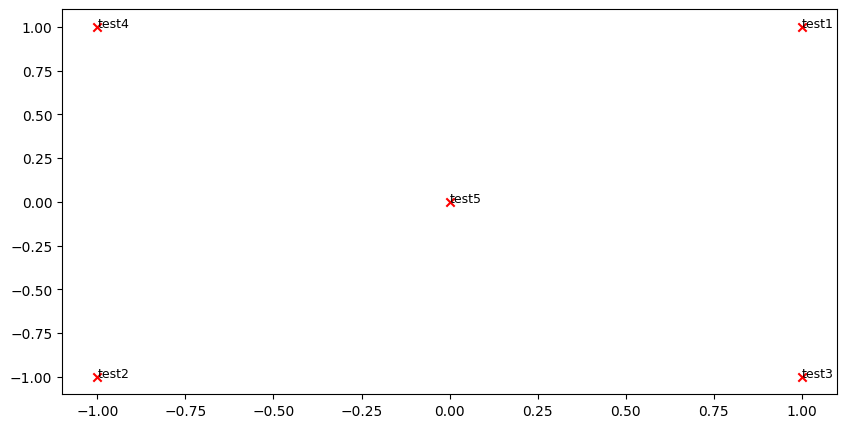

--------------------------------------------------------------------------------


In [13]:
# ---------------------
# Run this sanity check
# Note that this is not an exhaustive check for correctness.
# The plot produced should look like the "test solution plot" depicted below.
# ---------------------

print ("-" * 80)
print ("Outputted Plot:")

M_reduced_plot_test = np.array([[1, 1], [-1, -1], [1, -1], [-1, 1], [0, 0]])
word2ind_plot_test = {'test1': 0, 'test2': 1, 'test3': 2, 'test4': 3, 'test5': 4}
words = ['test1', 'test2', 'test3', 'test4', 'test5']
plot_embeddings(M_reduced_plot_test, word2ind_plot_test, words)

print ("-" * 80)

Running Truncated SVD over 7146 words...
Done.


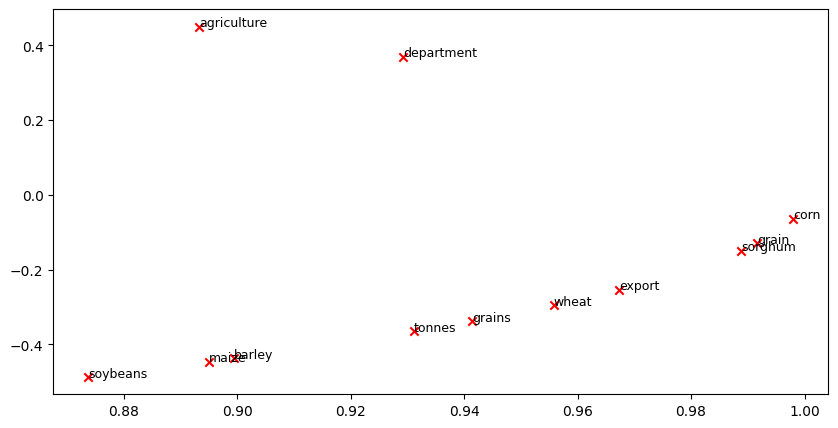

In [14]:
# -----------------------------
# Run This Cell to Produce Your Plot
# ------------------------------
reuters_corpus = read_corpus()
M_co_occurrence, word2ind_co_occurrence = compute_co_occurrence_matrix(reuters_corpus)
M_reduced_co_occurrence = reduce_to_k_dim(M_co_occurrence, k=2)

# Rescale (normalize) the rows to make them each of unit-length
M_lengths = np.linalg.norm(M_reduced_co_occurrence, axis=1)
M_normalized = M_reduced_co_occurrence / M_lengths[:, np.newaxis] # broadcasting

words = ['tonnes', 'grain', 'wheat',  'agriculture', 'corn', 'maize', 'export', 'department', 'barley', 'grains', 'soybeans', 'sorghum']

plot_embeddings(M_normalized, word2ind_co_occurrence, words)

Two cluster,i can observer(maize,barely),(gain,corn,sorghum),but all the agricultured words should beclosed together, and 'department' and 'export' can from another cluster.

In [15]:
def load_embedding_model():
    """ Load GloVe Vectors
        Return:
            wv_from_bin: All 400000 embeddings, each lengh 200
    """
    import gensim.downloader as api
    wv_from_bin = api.load("glove-wiki-gigaword-200")
    print("Loaded vocab size %i" % len(list(wv_from_bin.index_to_key)))
    return wv_from_bin

In [16]:
# -----------------------------------
# Run Cell to Load Word Vectors
# Note: This will take a couple minutes
# -----------------------------------
wv_from_bin = load_embedding_model()

[==================================================] 100.0% 252.1/252.1MB downloaded
Loaded vocab size 400000


In [17]:
def get_matrix_of_vectors(wv_from_bin, required_words=['tonnes', 'grain', 'wheat',  'agriculture', 'corn', 'maize', 'export', 'department', 'barley', 'grains', 'soybeans', 'sorghum']):
    """ Put the GloVe vectors into a matrix M.
        Param:
            wv_from_bin: KeyedVectors object; the 400000 GloVe vectors loaded from file
        Return:
            M: numpy matrix shape (num words, 200) containing the vectors
            word2ind: dictionary mapping each word to its row number in M
    """
    import random
    words = list(wv_from_bin.index_to_key)
    print("Shuffling words ...")
    random.seed(225)
    random.shuffle(words)
    words = words[:10000]
    print("Putting %i words into word2ind and matrix M..." % len(words))
    word2ind = {}
    M = []
    curInd = 0
    for w in words:
        try:
            M.append(wv_from_bin.get_vector(w))
            word2ind[w] = curInd
            curInd += 1
        except KeyError:
            continue
    for w in required_words:
        if w in words:
            continue
        try:
            M.append(wv_from_bin.get_vector(w))
            word2ind[w] = curInd
            curInd += 1
        except KeyError:
            continue
    M = np.stack(M)
    print("Done.")
    return M, word2ind

In [18]:
# -----------------------------------------------------------------
# Run Cell to Reduce 200-Dimensional Word Embeddings to k Dimensions
# Note: This should be quick to run
# -----------------------------------------------------------------
M, word2ind = get_matrix_of_vectors(wv_from_bin)
M_reduced = reduce_to_k_dim(M, k=2)

# Rescale (normalize) the rows to make them each of unit-length
M_lengths = np.linalg.norm(M_reduced, axis=1)
M_reduced_normalized = M_reduced / M_lengths[:, np.newaxis] # broadcasting

Shuffling words ...
Putting 10000 words into word2ind and matrix M...
Done.
Running Truncated SVD over 10012 words...
Done.


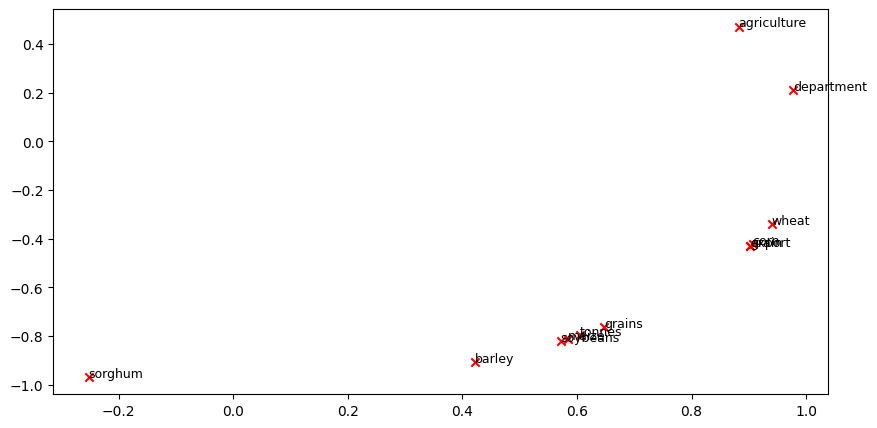

In [19]:
words = ['tonnes', 'grain', 'wheat',  'agriculture', 'corn', 'maize', 'export', 'department', 'barley', 'grains', 'soybeans', 'sorghum']
plot_embeddings(M_reduced_normalized, word2ind, words)

Here also,there are two tight clusters(wheat,corn,export),(grains,tonnes,maize,soybeans),rest are scattered.This is quite different from what we observed in co-occurence based word embeddings.The reason for this  difference could be the size of the corpus on which GloVe embeddings are trained.

Cosine Simolarity(余弦相似度)

Now that we have word vectors, we need a way to quantify the similarity between individual words, according to these vectors. One such metric is cosine-similarity. We will be using this to find words that are "close" and "far" from one another.

In [20]:
# ------------------
# Write your implementation here.

words = ['beer', 'house', 'china', 'tree']
for word in words:
  print('word = ', word)
  pprint.pprint(wv_from_bin.most_similar(word))

# ------------------

word =  beer
[('drink', 0.7326474785804749),
 ('drinks', 0.7114081382751465),
 ('liquor', 0.6575121879577637),
 ('beers', 0.6534110903739929),
 ('beverage', 0.6375210881233215),
 ('bottles', 0.6363894939422607),
 ('wine', 0.635413646697998),
 ('bottle', 0.6136217713356018),
 ('brewery', 0.6091495156288147),
 ('beverages', 0.6087833046913147)]
word =  house
[('houses', 0.679559051990509),
 ('senate', 0.6694664359092712),
 ('office', 0.6323703527450562),
 ('congressional', 0.6080436110496521),
 ('room', 0.606050431728363),
 ('building', 0.6041929721832275),
 ('capitol', 0.6000953912734985),
 ('congress', 0.5921366214752197),
 ('republicans', 0.5810678601264954),
 ('home', 0.5763988494873047)]
word =  china
[('chinese', 0.8248451352119446),
 ('beijing', 0.7936524748802185),
 ('taiwan', 0.7379320859909058),
 ('shanghai', 0.6786543130874634),
 ('mainland', 0.6734353303909302),
 ('hong', 0.655049204826355),
 ('guangdong', 0.6501193642616272),
 ('japan', 0.6291959285736084),
 ('kong', 0.62408

i have tried for ['beer', 'house', 'china', 'tree'] words. For some words like 'house' and 'china' the top 10 meanings represent multiple meaning.For words, 'tree', 'house' one meaing is dominatingly present in the top 10 results
The reasons for this could be distribution of meaning and senses in the corpus on which the glove is trained.

In [21]:
# ------------------
# Write your implementation here.

w1 = 'big'
w2 = 'gigantic'
w3 = 'tiny'

print('Distance(\'{}\', \'{}\')='.format(w1, w2), wv_from_bin.distance(w1, w2))
print('Distance(\'{}\', \'{}\')='.format(w1, w3), wv_from_bin.distance(w1, w3))

print()

w1 = 'hot'
w2 = 'parched'
w3 = 'cold'

print('Distance(\'{}\', \'{}\')='.format(w1, w2), wv_from_bin.distance(w1, w2))
print('Distance(\'{}\', \'{}\')='.format(w1, w3), wv_from_bin.distance(w1, w3))

# ------------------

Distance('big', 'gigantic')= 0.5054686367511749
Distance('big', 'tiny')= 0.571981281042099

Distance('hot', 'parched')= 0.756472185254097
Distance('hot', 'cold')= 0.40621882677078247


I found tree such triplets(big, gigantic,tiny)(hot,parched,cold).But the first triplet did not meet my expections. The (big, gigantic) cosine silmilarity is less than (big, tiny). And the second triplet was all right.From my point of view, this unexpected exhibition that the antonym pairs such as (big, tiny) are frequent in sililar context in the corpus than the possible synonym pair (big, gigatic)

In [22]:
# Run this cell to answer the analogy -- man : grandfather :: woman : x
pprint.pprint(wv_from_bin.most_similar(positive=['woman', 'grandfather'], negative=['man']))

[('grandmother', 0.7608445286750793),
 ('granddaughter', 0.7200808525085449),
 ('daughter', 0.7168302536010742),
 ('mother', 0.7151536345481873),
 ('niece', 0.7005682587623596),
 ('father', 0.6659887433052063),
 ('aunt', 0.6623408794403076),
 ('grandson', 0.6618767976760864),
 ('grandparents', 0.644661009311676),
 ('wife', 0.6445354223251343)]


x = g+(w-m)

In [24]:
pprint.pprint(wv_from_bin.most_similar(positive=['woman', 'prince'], negative=['man']))

print()

pprint.pprint(wv_from_bin.most_similar(positive=['band', 'movie'], negative=['actor']))

[('princess', 0.7453499436378479),
 ('duchess', 0.6067375540733337),
 ('daughter', 0.5600141882896423),
 ('queen', 0.5452842712402344),
 ('hrh', 0.5299034118652344),
 ('wife', 0.511596143245697),
 ('marry', 0.5082696676254272),
 ('naruhito', 0.5037658214569092),
 ('mistress', 0.5026963353157043),
 ('crown', 0.49816757440567017)]

[('album', 0.6973601579666138),
 ('bands', 0.6667339205741882),
 ('song', 0.6096614003181458),
 ('albums', 0.6091905236244202),
 ('songs', 0.6051977276802063),
 ('compilation', 0.5955536365509033),
 ('ep', 0.5948136448860168),
 ('rock', 0.5795069336891174),
 ('soundtrack', 0.5739437341690063),
 ('music', 0.5692933797836304)]


man:prince::woman:princess

> 缩进块

actor:movie::band:album

In [25]:
pprint.pprint(wv_from_bin.most_similar(positive=['movie', 'magazine'], negative=['editor']))

[('movies', 0.7337396144866943),
 ('film', 0.7336824536323547),
 ('films', 0.7069437503814697),
 ('comedy', 0.6201825141906738),
 ('sequel', 0.6178272366523743),
 ('hollywood', 0.6076249480247498),
 ('remake', 0.5936723947525024),
 ('blockbuster', 0.5882182121276855),
 ('video', 0.5858933925628662),
 ('animated', 0.5736064314842224)]


Expecting --> editor:magazine::director:movie

Obtained --> editor:magazine::movies:movie

In [26]:
# Run this cell
# Here `positive` indicates the list of words to be similar to and `negative` indicates the list of words to be
# most dissimilar from.
pprint.pprint(wv_from_bin.most_similar(positive=['girl', 'toy'], negative=['boy']))
print()
pprint.pprint(wv_from_bin.most_similar(positive=['boy', 'toy'], negative=['girl']))

[('toys', 0.7094953060150146),
 ('doll', 0.5932914614677429),
 ('dolls', 0.570662260055542),
 ('barbie', 0.5407706499099731),
 ('mattel', 0.5328551530838013),
 ('accessories', 0.5206909775733948),
 ('hasbro', 0.49227219820022583),
 ('jewelry', 0.47385692596435547),
 ('lego', 0.4690813422203064),
 ('apparel', 0.46136239171028137)]

[('toys', 0.71570885181427),
 ('hasbro', 0.5164632797241211),
 ('robot', 0.47317108511924744),
 ('pet', 0.4670490324497223),
 ('manufacturer', 0.4668163061141968),
 ('mattel', 0.4582391679286957),
 ('lego', 0.45811763405799866),
 ('miniature', 0.4441472291946411),
 ('makers', 0.44298243522644043),
 ('manufactured', 0.44275349378585815)]


With the above example, it is clear that word-vectors are also influenced by the various kinds of biases. In the first exmaple, specific types of toys are associated with girl, eg. doll, dolls, barbie, jewelry, apparel which do not shows meaning of 'boy' and 'toy'.In contrary, the 2nd example shows meaning such as 'hasbro', 'robot', 'lego', 'miniature' which do get meaning of word-vectors. Additionally, the meaning words, i.e.'makers', 'manufacturer' only associated with boy which reflects the zender bias that only male are associated to such sectors.

In [31]:
# ------------------
# Write your implementation here.
print('man : worker :: woman : x')
pprint.pprint(wv_from_bin.most_similar(positive=['woman', 'worker'], negative=['man']))
print()
print('woman : worker :: man : x')
pprint.pprint(wv_from_bin.most_similar(positive=['man', 'worker'], negative=['woman']))

# ------------------

man : worker :: woman : x
[('employee', 0.6375863552093506),
 ('workers', 0.6068920493125916),
 ('nurse', 0.5837947130203247),
 ('pregnant', 0.5363885164260864),
 ('mother', 0.5321308970451355),
 ('employer', 0.5127025842666626),
 ('teacher', 0.5099576711654663),
 ('child', 0.5096741318702698),
 ('homemaker', 0.5019454956054688),
 ('nurses', 0.4970572590827942)]

woman : worker :: man : x
[('workers', 0.611325740814209),
 ('employee', 0.5983108878135681),
 ('working', 0.5615329742431641),
 ('laborer', 0.5442320108413696),
 ('unemployed', 0.536851704120636),
 ('job', 0.5278826355934143),
 ('work', 0.5223963856697083),
 ('mechanic', 0.5088937282562256),
 ('worked', 0.5054520964622498),
 ('factory', 0.4940454363822937)]


Comparing the 'man:worker::woman:x' with 'woman:worker::man:x', there clearly visible some female-associated occupations do not show up in the male-associated list, such as, 'nurse(s)', 'teacher'.This may be caused by the statistical nature of the model trained on a general corpora. But his reflects the gender bias of the model that it has a stereotype tht these occupations are more related to females but not males.

Moreover, in the list there are some distinctive words like 'pregant', 'homemaker', 'child' only assocated to female. It shows anothe stereotype, that woman are only 'meant for housework'. This is very danferous for as it enhances the employment discriminator for women.

As the statistical models are only the reflection/abstraction of the data on which they are trained. Since, the bias exists in the real life, it gets into the corpus also we lollect in a real-world scenario, e.g. Internet, social text. This leads to a biased model.

There are many possible biases in the model. To capture one, we have redesigned the corpus by carefully flitering out a specific bias from the data.Then the new model trained on new corpus can be compared with the previous one. This experiment could be hard though, since manually removing biased contents fro the huge training data is time consuming.